# The first part of this notebook loads the data. It was done by @ygg_anderson 

In [1]:
import panel as pn
pn.extension()
import pandas as pd
import numpy as np
#import hvplot.pandas
import param, random
import datetime as dt

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
periods = [
    "#17 May 7",
    "#16 Apr 24",
    "#15 Apr 9",
    "#14 Mar 26",
    "#13 Mar 12",
    "#12 Feb 26",
    "#11 Feb 12",
    "#10 Jan 29",
    "#9 Jan 15", 
    "#8 Jan 1",
    "#7 Dec 18",
    "#6 Dec 4",
    "#5 Nov 20", #
    "#4 Nov 6", #
    "#3 Oct 23", #
    "#2 Oct 9",
    "#1 Sept 24", #
    "#0 Sept 7 (historic)", #
]

In [3]:
data = []
for i, period in enumerate(periods):
    
    if i not in (17, 16, 14, 12, 13):
    
        df = pd.read_excel('data/TEC Praise Quantification.xlsx', skiprows=2, sheet_name=period,engine='openpyxl', usecols="A:M")

        df[['v1','v2','v3']] = list(df.columns[6:9])

        df.columns = list(df.columns[:6]) + ['v1 norm', 'v2 norm', 'v3 norm'] + list(df.columns[9:])

        df['period'] = period

        df = df.dropna(thresh=8)

        data.append(df)

In [4]:
combined_data = pd.concat(data)

In [5]:
combined_data

,To,From,Reason for dishing,Unnamed: 3,Date,Room,v1 norm,v2 norm,v3 norm,Avg %,IH per Praise,IH per person,Unnamed: 12,v1,v2,v3,period,Cred per Praise,Cred per person,To.1
0,zeptimusQ,Tam2140#9361,for hosting this kicking params party!,Token Engineering Commons,May-07-2021,🙏praise,10000.0,100.0,200.0,0.001963,2.355252,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
1,zeptimusQ,iviangita#3204,for hosting and leading a lot of params parties,Token Engineering Commons,May-07-2021,🙏praise,10000.0,100.0,100.0,0.001663,1.995539,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
2,zeptimusQ,Juankbell#7458,for testing and deploying the bot to record an...,Token Engineering Commons,Apr-28-2021,🙏praise,1000.0,200.0,200.0,0.001342,1.610872,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
3,zeptimusQ,iviangita#3204,for the huge success of the MVV process,Token Engineering Commons,Apr-30-2021,🙏praise,1000.0,200.0,100.0,0.001043,1.251160,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
4,zeptimusQ,iviangita#3204,"for his awesome work on the recorder bot, for ...",Token Engineering Commons,Apr-30-2021,🙏praise,1000.0,200.0,100.0,0.001043,1.251160,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,solsista,JessicaZartler,giving feedback on the TEC logo exercise - tha...,PRAISE,2020-09-29 00:00:00,TE Praise,1.0,10.0,30.0,0.005905,NaN,NaN,NaN,Tier,Griff,Livia,#2 Oct 9,0.915204,1.029059,solsista
120,solsista,krrisis,an interesting discussion on realigning incent...,PRAISE,2020-09-28 00:00:00,Commons Stack,3.0,1.0,4.0,0.000735,NaN,NaN,NaN,Tier,Griff,Livia,#2 Oct 9,0.113855,1.029059,solsista
121,sponnet2,GriffGreen,their INCREDIBLE progress on the CSTK token da...,PRAISE,2020-10-06 00:00:00,CS dDEV Team,3.0,5.0,10.0,0.002232,NaN,NaN,NaN,Tier,Griff,Livia,#2 Oct 9,0.345931,0.345931,sponnet2
122,tylerdmace,JessicaZartler,recording the cadCAD community call today - th...,PRAISE,2020-10-08 00:00:00,cadCAD_org,2.0,10.0,10.0,0.003023,NaN,NaN,NaN,Tier,Griff,Livia,#2 Oct 9,0.468519,0.468519,tylerdmace


quantifiers = combined_data[combined_data[['IH per Praise', 'IH per person', 'Unnamed: 12']].isna().all(axis=1)]
quantifiers

In [6]:
receivers = combined_data[~combined_data[['IH per Praise', 'IH per person', 'Unnamed: 12']].isna().all(axis=1)]
receivers

,To,From,Reason for dishing,Unnamed: 3,Date,Room,v1 norm,v2 norm,v3 norm,Avg %,IH per Praise,IH per person,Unnamed: 12,v1,v2,v3,period,Cred per Praise,Cred per person,To.1
0,zeptimusQ,Tam2140#9361,for hosting this kicking params party!,Token Engineering Commons,May-07-2021,🙏praise,10000.0,100.0,200.0,0.001963,2.355252,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
1,zeptimusQ,iviangita#3204,for hosting and leading a lot of params parties,Token Engineering Commons,May-07-2021,🙏praise,10000.0,100.0,100.0,0.001663,1.995539,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
2,zeptimusQ,Juankbell#7458,for testing and deploying the bot to record an...,Token Engineering Commons,Apr-28-2021,🙏praise,1000.0,200.0,200.0,0.001342,1.610872,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
3,zeptimusQ,iviangita#3204,for the huge success of the MVV process,Token Engineering Commons,Apr-30-2021,🙏praise,1000.0,200.0,100.0,0.001043,1.251160,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
4,zeptimusQ,iviangita#3204,"for his awesome work on the recorder bot, for ...",Token Engineering Commons,Apr-30-2021,🙏praise,1000.0,200.0,100.0,0.001043,1.251160,39.04072,zeptimusQ,Metaverde,Juank,Edu,#17 May 7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,atacas,Quantifiers,Gets paid by the Commons Stack so he only gets...,NaN,None,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,atacas,Griff,Zep,Santi,#6 Dec 4,-5.494332,0.969588,NaN
506,luukweber,iviangita,participating in the Praisegiving Call 😀,PRAISE,2020-11-28 00:00:00,TE Praise,40.0,30.0,30.0,0.001180,NaN,NaN,luukweber,Griff,Zep,Santi,#6 Dec 4,0.924158,0.924158,NaN
507,krrisis,GriffGreen,sharing the gitcoin blog post... lots of great...,PRAISE,2020-12-02 00:00:00,Commons Stack,10.0,40.0,40.0,0.001103,NaN,NaN,krrisis,Griff,Zep,Santi,#6 Dec 4,0.863962,0.863962,NaN
508,sbilbao,JessicaZartler,joining the TE Praise channel and the TEC lab ...,PRAISE,2020-11-27 00:00:00,TE Praise,50.0,30.0,10.0,0.001005,NaN,NaN,sbilbao,Griff,Zep,Santi,#6 Dec 4,0.786973,0.786973,NaN


---

# Investigations from octopus🐙

I'm going to do some basic analysis of the parts of the data set that are encoded with words. 

In [7]:
import seaborn as sns #seaborn is my plotting tool of choice

In [8]:
receivers.columns

Index(['To', 'From', 'Reason for dishing', 'Unnamed: 3', 'Date', 'Room',
       'v1 norm', 'v2 norm', 'v3 norm', 'Avg %', 'IH per Praise',
       'IH per person', 'Unnamed: 12', 'v1', 'v2', 'v3', 'period',
       'Cred per Praise', 'Cred per person', 'To.1'],
      dtype='object')

### Where does praise happen?

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Source'),
 Text(0.5, 1.0, 'Where Praise is Given')]

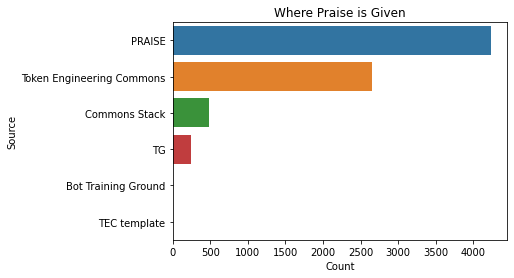

In [9]:
sources = receivers.groupby("Unnamed: 3").count()
sources

ax = sns.barplot(y = sources.index, x = sources["To"],  order = sources.sort_values("To", ascending = False).index)
ax.set(xlabel="Count", ylabel="Source", title = "Where Praise is Given")

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Source'),
 Text(0.5, 1.0, 'Where Praise is Given')]

/home/shawn/.virtualenvs/LTF/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shawn/.virtualenvs/LTF/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shawn/.virtualenvs/LTF/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127999 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shawn/.virtualenvs/LTF/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shawn/.virtualenvs/LTF/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shawn/.virtualenvs/LTF/lib/python3.8/site-pa

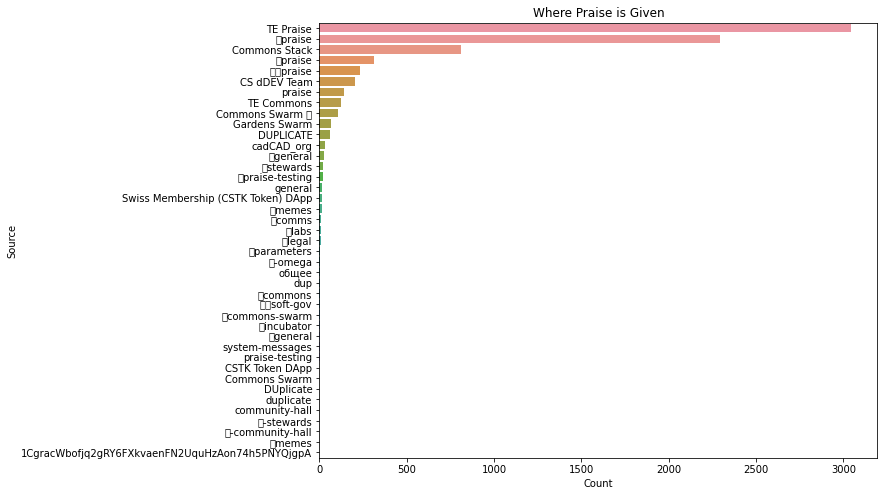

In [10]:
room_sources = receivers.groupby("Room").count()
room_sources

plt.figure(figsize=(10,8))
ax = sns.barplot(y = room_sources.index, x = room_sources["To"],  order = room_sources.sort_values("To",                                                                                                 ascending = False).index)
ax.set(xlabel="Count", ylabel="Source", title = "Where Praise is Given")

### A naming issue in our data 

 There is a **naming** issue in the data frame that we need to address.


The issue is that some users receive praise with variations on their names. It would be good to consolidate these users for this analysis. 

There are three issues we see:
1. inconsistent case (zeptimusq vs. zeptimusQ)
2. usernames with punctuation that get dropped when praising (ygg_anderson vs. ygganderson)
3. the Discord four-digit identifier (AmwFund vs. AmwFund#0979)

Here are the potential fixes:
1. enforce all lowercase for names
2. drop all punctuation in names
3. drop the pattern "#dddd" where d is any digit.

Now we write a function to do all of these.

In [11]:
import re

def clean_name(name):
    new_name = str(name)
    new_name = new_name.lower()
    new_name = re.sub('#\d\d\d\d','',new_name)
    new_name = re.sub('[^A-Za-z0-9]+', '', new_name) #remove all non-alphanumeric characters
    return new_name

Below are some sanity checks that the function works as intended. 

In [12]:
clean_name("zeptimusQ")

'zeptimusq'

In [13]:
clean_name("ygg_anderson")

'ygganderson'

In [14]:
clean_name("AmwFund#0979")

'amwfund'

In [15]:
clean_name("Caeser (PST)#0046")

'caeserpst'

It's true some information is lost, but we need some kind of standardized format.  Now we will clean the **"To"** and **"From"**columns to match this standardized form (other name columns like **"v1"** should probably also be cleaned, but we'll leave them for now.)

In [16]:
receivers["To"] = receivers["To"].map(clean_name)
receivers["From"] = receivers["From"].map(clean_name)


<ipython-input-16-6e59e6a5d5e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receivers["To"] = receivers["To"].map(clean_name)
<ipython-input-16-6e59e6a5d5e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receivers["From"] = receivers["From"].map(clean_name)


In [17]:
receivers["To"]

0                    zeptimusq
1                    zeptimusq
2                    zeptimusq
3                    zeptimusq
4                    zeptimusq
                ...           
505                     atacas
506                  luukweber
507                    krrisis
508                    sbilbao
509    cryptononymouseconomist
Name: To, Length: 7947, dtype: object

In [18]:
receivers["From"]

0             tam2140
1           iviangita
2           juankbell
3           iviangita
4           iviangita
            ...      
505       quantifiers
506         iviangita
507        griffgreen
508    jessicazartler
509    jessicazartler
Name: From, Length: 7947, dtype: object

In [19]:
receivers.to_csv("data/receivers-partially-cleaned.csv")

### <span style = "color:red"> Important issues with names </span>
1. More duplicates? (zeptimus vs. zeptimusq)
2. Apply cleaning to v1,v2,v3?


### Do some basic analysis. 

Now I'm going to create a new data frame that incorporates how many times each user gave and received praise. The next few cells accomplish this by using pivot_tables to create data frames which are then merged, with missing values replaced by 0.

In [20]:
praise_to = receivers.pivot_table(index = ["To"], aggfunc = 'size' ).to_frame(name = "to")
praise_to

,to
To,
0xjoshua,1
aaronsoskin,2
abchewey,1
abornstein,1
acryptomuppet,1
...,...
ygganderson,182
youngkidwarrior,1
zeptimusq,380


In [21]:
praise_from = receivers.pivot_table(index = ["From"], aggfunc = 'size').to_frame(name = "from")
praise_from

,from
From,
adnfx2,2
akrtws,5
amwfund,15
annamarieswan,10
anthonyoliai,2
...,...
vyvyvi,34
xgabi,2
ygganderson,57


In [22]:
praise_to_and_from = pd.concat([praise_from, praise_to], axis = 1)
praise_to_and_from = praise_to_and_from.fillna(0)
praise_to_and_from.head(5)

,from,to
adnfx2,2.0,4.0
akrtws,5.0,43.0
amwfund,15.0,0.0
annamarieswan,10.0,28.0
anthonyoliai,2.0,25.0


### Relationship Between Givers and Receivers

Let's make a scatterplot to see if we think there is a relationship betwen these two quantities. 

[Text(0.5, 1.0, 'Praise: To and From')]

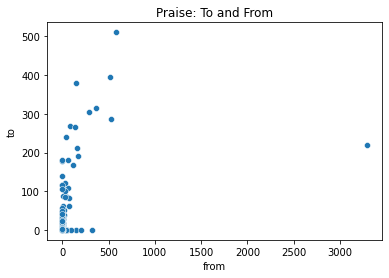

In [23]:
ax = sns.scatterplot(x = "from", y = "to", data = praise_to_and_from)
ax.set(title = "Praise: To and From")

There doen't apear to be much of a relationship, primarily because **so many users** have zero values of **from**; this includes many users who are frequent praise recipients but do not give much. 

<AxesSubplot:xlabel='to', ylabel='Count'>

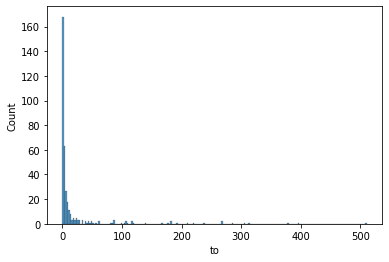

In [24]:
sns.histplot(data = praise_to_and_from, x = "to")

There are some outliers worth looking at. We'll look at the top 5% for both "from" and "to". 

In [25]:
print("Here is the top 5% in terms of receiving praise. \n")
praise_to_and_from[praise_to_and_from["to"] > praise_to_and_from["to"].quantile(.95)]["to"].sort_values(ascending = False)

Here is the top 5% in terms of receiving praise. 



griffgreen        511.0
liviade           396.0
zeptimusq         380.0
juankbell         314.0
tam2140           305.0
jessicazartler    286.0
freedumbs00       268.0
sembrestels       267.0
santigs67         239.0
iviangita         219.0
markop            211.0
cranders71        192.0
naynaysoo         182.0
ygganderson       182.0
vegayp            177.0
chuygarcia92      167.0
mateodaza         139.0
pauloc2d          120.0
Name: to, dtype: float64

In [26]:
print("Here is the top 5% in terms of giving praise. \n")
praise_to_and_from[praise_to_and_from["from"] > praise_to_and_from["to"].quantile(.95)]["from"].sort_values(ascending = False)

Here is the top 5% in terms of giving praise. 



iviangita         3288.0
griffgreen         575.0
jessicazartler     531.0
liviade            510.0
juankbell          364.0
quantifiers        316.0
tam2140            293.0
zeptimus           199.0
cranders71         165.0
markop             161.0
griff              147.0
zeptimusq          143.0
sembrestels        139.0
Name: from, dtype: float64

### <span style = "color:red"> Some Issues: 1. Again it might be important to know whether some of these should be combined: are **zeptimus** and **zeptimusq** the same person? How about **griff** and **griffgreen**? 2. Who is **quantifiers**?  </span>

<AxesSubplot:xlabel='to', ylabel='Count'>

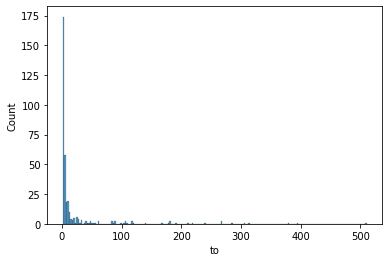

In [27]:
sns.histplot(data = praise_to_and_from.query("to > 0"), x = "to")

In [28]:
sum(praise_to_and_from["to"] <= 1)/len(praise_to_and_from)

0.31767955801104975

In [29]:
praise_to_and_from["from"] == 0

adnfx2             False
akrtws             False
amwfund            False
annamarieswan      False
anthonyoliai       False
                   ...  
yalormewn           True
yangwao             True
youngkidwarrior     True
zeroknowledge       True
zoushhoang          True
Name: from, Length: 362, dtype: bool

In [30]:
sum(praise_to_and_from["from"] == 0)/len(praise_to_and_from)

0.8149171270718232

In [31]:
praise_to_and_from[praise_to_and_from["from"] > 0]["from"].mean()

118.61194029850746

Almost 80% of users here have not given any praise (this might be skewed *slightly* by the naming issue above, but probably not much). This is probably described by a Pareto distribution -- with 20% of the users giving 100% of the praise. Among users who gave some praise, they gave an average of roughly 118 praises.

In [32]:
print("Here are summary statistics for all users in the data set. \n")
praise_to_and_from.describe()

Here are summary statistics for all users in the data set. 



,from,to
count,362.000000,362.000000
mean,21.953039,21.953039
std,182.659290,60.477514
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,3.000000
75%,0.000000,10.000000
max,3288.000000,511.000000


In [33]:
print("Here are summary statistics for all users in the data set who have given at least one praise. \n")
praise_to_and_from[praise_to_and_from["from"] > 0].describe()

Here are summary statistics for all users in the data set who have given at least one praise. 



,from,to
count,67.00000,67.000000
mean,118.61194,87.731343
std,413.34566,115.256707
min,1.00000,0.000000
25%,3.50000,3.000000
50%,13.00000,34.000000
75%,75.00000,112.500000
max,3288.00000,511.000000


### An attempt at feature engineering: generosity

This relationship between **to** and **from** is somewhat interesting -- we define **generosity** as

$$\text{generosity} = \frac{\text{praises given}}{\text{praises received + 1}}$$

(the "+1" in the denominator is to avoid "divide by 0" issues). 

Does this give useful information? Not sure, but I thought I'd include it. 

In [34]:
praise_to_and_from["generosity"] = praise_to_and_from["from"]/(praise_to_and_from["to"] + 1)
praise_to_and_from["generosity"].sort_values(axis = 0, ascending = False)

quantifiers        316.0
zeptimus           199.0
griff              147.0
kris                94.0
eduardovegap        49.0
                   ...  
miles                0.0
misterboyfriend      0.0
monstros1ty          0.0
morgangr             0.0
jameszaki            0.0
Name: generosity, Length: 362, dtype: float64

# Investigations from courier

In [35]:
df = pd.read_csv("data/receivers-partially-cleaned.csv")
df.head()
df.columns

Index(['Unnamed: 0', 'To', 'From', 'Reason for dishing', 'Unnamed: 3', 'Date',
       'Room', 'v1 norm', 'v2 norm', 'v3 norm', 'Avg %', 'IH per Praise',
       'IH per person', 'Unnamed: 12', 'v1', 'v2', 'v3', 'period',
       'Cred per Praise', 'Cred per person', 'To.1'],
      dtype='object')

In [36]:
df.isna().sum()

Unnamed: 0               0
To                       1
From                     1
Reason for dishing       0
Unnamed: 3             317
Date                   317
Room                   317
v1 norm               2159
v2 norm               1288
v3 norm               1287
Avg %                   17
IH per Praise          564
IH per person          510
Unnamed: 12             64
v1                       0
v2                       0
v3                       0
period                   0
Cred per Praise       7437
Cred per person       7437
To.1                  7947
dtype: int64

We observe many null values in the final 3 columns. We will drop these for now.

In [37]:
df.drop(['Cred per Praise', 'Cred per person', 'To.1'], inplace=True, axis=1)

# Date inconsistency

It appears that the format of the dates in the data is inconsistent. Some entries opt for the format Month-Day-Year while others use Year-Month-Day.

In [38]:
df['Date']

0               May-07-2021
1               May-07-2021
2               Apr-28-2021
3               Apr-30-2021
4               Apr-30-2021
               ...         
7942                    NaN
7943    2020-11-28 00:00:00
7944    2020-12-02 00:00:00
7945    2020-11-27 00:00:00
7946    2020-11-27 00:00:00
Name: Date, Length: 7947, dtype: object

In [39]:
df["Date"].tail()

7942                    NaN
7943    2020-11-28 00:00:00
7944    2020-12-02 00:00:00
7945    2020-11-27 00:00:00
7946    2020-11-27 00:00:00
Name: Date, dtype: object

In [40]:
df["Date"].head()

0    May-07-2021
1    May-07-2021
2    Apr-28-2021
3    Apr-30-2021
4    Apr-30-2021
Name: Date, dtype: object

We will drop any NA dates.

In [41]:
df["Date"] = df["Date"].dropna()

In [42]:
from dateutil import parser

First we begin by turning all of the dates in the column into strings.

In [43]:
df["Date"] = df["Date"].apply(str)

Some other dates just have the word "dup" instead of a date. We can get rid of these. 

In [44]:
df[df["Date"] == "dup"]

,Unnamed: 0,To,From,Reason for dishing,Unnamed: 3,Date,Room,v1 norm,v2 norm,v3 norm,Avg %,IH per Praise,IH per person,Unnamed: 12,v1,v2,v3,period
7459,22,ygganderson,jessicazartler,hosting an amazing first TEC lab today on Pand...,PRAISE,dup,dup,NaN,NaN,NaN,0.0,NaN,NaN,ygganderson,Griff,Zep,Santi,#6 Dec 4
7693,256,liviade,iviangita,organizing the Praisegiving Call,PRAISE,dup,dup,NaN,NaN,NaN,0.0,NaN,NaN,liviade,Griff,Zep,Santi,#6 Dec 4
7707,270,pauloc2d,zeptimusq,"completed the hatch connector, deployed xDai s...",PRAISE,dup,dup,NaN,NaN,NaN,0.0,NaN,NaN,paulo_c2d,Griff,Zep,Santi,#6 Dec 4
7743,306,jessicazartler,iviangita,organizing the Praisegiving Call,PRAISE,dup,dup,NaN,NaN,NaN,0.0,NaN,NaN,jessicazartler,Griff,Zep,Santi,#6 Dec 4
7835,398,gfriis,tam2140,"championing Tokenlog, even as you start your n...",PRAISE,dup,dup,NaN,NaN,NaN,0.0,NaN,NaN,gfriis,Griff,Zep,Santi,#6 Dec 4


In [45]:
df = df[df["Date"] != "dup"]

In [46]:
df = df[df["Date"] != "nan"]

In [47]:
def normalize_dates(date_str):
  """
  This function takes in a string that contains a date and converts it to the 
  format Year-Month-Day.
  
  :param date_str: The string containing the date. 
  :return: The date in the format Year-Month-Day.
  """
  d = parser.parse(date_str)
  return d.strftime("%Y-%m-%d")

A quick sanity check to ensure that we have the correct results after this function was applied.

In [48]:
df["Date"].apply(normalize_dates)

0       2021-05-07
1       2021-05-07
2       2021-04-28
3       2021-04-30
4       2021-04-30
           ...    
7941    2020-12-01
7943    2020-11-28
7944    2020-12-02
7945    2020-11-27
7946    2020-11-27
Name: Date, Length: 7625, dtype: object

In [49]:
df["Date"]

0               May-07-2021
1               May-07-2021
2               Apr-28-2021
3               Apr-30-2021
4               Apr-30-2021
               ...         
7941    2020-12-01 00:00:00
7943    2020-11-28 00:00:00
7944    2020-12-02 00:00:00
7945    2020-11-27 00:00:00
7946    2020-11-27 00:00:00
Name: Date, Length: 7625, dtype: object

In [50]:
df["Date"] = pd.to_datetime(df["Date"])

Now we add features for the year month and day.

In [51]:
df["Year"] = df["Date"].dt.year

In [52]:
df["Month"] = df["Date"].dt.month

In [53]:
df["Day"] = df["Date"].dt.day

Now we can group the data based on these features.

In [54]:
days = df.groupby(['Day']).To.nunique().reset_index()

In [55]:
days

,Day,To
0,1,61
1,2,80
2,3,97
3,4,91
4,5,131
5,6,55
6,7,98
7,8,91
8,9,89
9,10,45


Consider a plot of the number of praises given broken down by day of the month. We see that the most praise is given on the 5th day of the month.

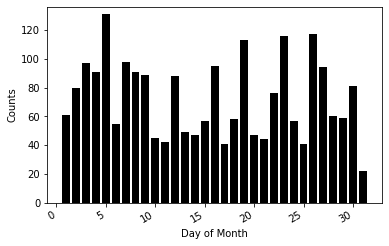

In [56]:
fig, ax = plt.subplots()
ax.bar(days["Day"], days["To"], color='k')
ax.set_ylim(0, days["To"].max()+5)
fig.autofmt_xdate()
plt.xlabel('Day of Month')
plt.ylabel('Counts')
plt.show()


In [57]:
months = df.groupby(['Month']).To.nunique().reset_index()

Consider a plot of the number of praises given broken down by the month. We see that the most praise is given in April. Interestingly, no praise at all is given between the months of June-October. 

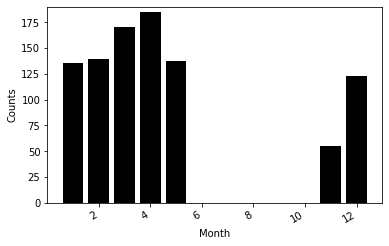

In [58]:
fig, ax = plt.subplots()
ax.bar(months["Month"], months["To"], color='k')
ax.set_ylim(0, months["To"].max()+5)
fig.autofmt_xdate()
plt.xlabel('Month')
plt.ylabel('Counts')
plt.show()

In [59]:
dates = df.groupby(['Date']).To.nunique().reset_index()

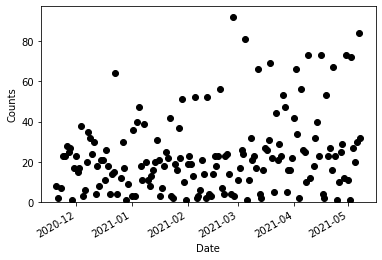

In [60]:

fig, ax = plt.subplots()
ax.plot_date(dates["Date"], dates["To"], color='k', xdate=True)
ax.set_ylim(0, dates["To"].max()+5)
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()

<AxesSubplot:xlabel='Date', ylabel='To'>

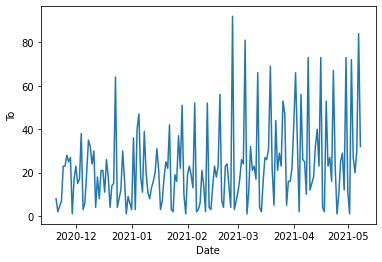

In [61]:
sns.lineplot(x="Date", y="To", data=dates)

In [62]:
dates.sort_values(by=['To'], ascending=False)

,Date,To
95,2021-02-26,92
163,2021-05-07,84
101,2021-03-05,81
156,2021-04-30,73
136,2021-04-09,73
...,...,...
37,2020-12-29,1
69,2021-01-31,1
102,2021-03-06,1
158,2021-05-02,1


In [63]:
df.to_csv("data/processed_praise.csv")

In [64]:
# Run this cell to install the pygraphviz library
#!apt-get install python3-dev graphviz libgraphviz-dev pkg-config
#!pip install pygraphviz

In [65]:
import networkx as nx
import pygraphviz

We will attempt to make a graph from the dataframe. 

First we will begin with a simple proof of concept. 

In [66]:
df = pd.read_csv("data/receivers-partially-cleaned.csv")
df.head()
df.columns
G = nx.DiGraph()
edges = df[['To','From']]


for ind, tup in edges[1:2].iterrows():
  to = tup[0]
  fro = tup[1]
  G.add_edge(fro, to)

  
G.edges
G = nx.nx_agraph.to_agraph(G)

In [67]:
G.layout(prog="dot")
G.draw("outputs/file.png") 

In [68]:
edges[1:2]


,To,From
1,zeptimusq,iviangita


![](https://drive.google.com/uc?export=view&id=1u9YuyqRxjnbXfDNA3ywuxNTI4CPWo54h)

Now we create a function that will automate this process.

In [69]:
def viz_graph(df, file_name):
  """
  Creates a visualization of a graph created from a dataset of praise. 

  :param df: The dataframe that contains who the praise is from and who it is to.
  Note that this dataframe should ONLY contain columns To and From.
  :param file_name: The name of the image that will be saved to your computer. 
  """

  G = nx.DiGraph()

  for ind, tup in df.iterrows():
    to = tup[0]
    fro = tup[1]
    G.add_edge(fro, to)

  G = nx.nx_agraph.to_agraph(G)
  G.layout(prog="dot")
  G.draw(file_name) 
  return G

In [70]:
#viz_graph(edges, "praise_graph.png")

You can use boolean conditions to get more specific graphs. 

In [71]:
#viz_graph(edges[edges["To"] == "zeptimusQ"], "zeptimus_praise_graph.png")

In [76]:
def to_user_graph(df, user, file_name):
  """
  Creates a visualization of a graph created from a dataset of praise. 

  :param df: The dataframe that contains who the praise is from and who it is to.
  Note that this dataframe should ONLY contain columns To and From.
  :param user: All donations to this user will be graphed. 
  :param file_name: The name of the image that will be saved to your computer. 
  """
  df = pd.read_csv("data/receivers-partially-cleaned.csv")
  G = nx.DiGraph()

  for ind, tup in edges[edges["To"] == user].iterrows():
    to = tup[0]
    fro = tup[1]
    G.add_edge(fro, to)

  G = nx.nx_agraph.to_agraph(G)
  G.layout(prog="dot")
  G.draw(file_name) 
  return G

In [77]:
def from_user_graph(df, user, file_name):
  """
  Creates a visualization of a graph created from a dataset of praise. 

  :param df: The dataframe that contains who the praise is from and who it is to.
  Note that this dataframe should ONLY contain columns To and From.
  :param user: All donations from this user will be graphed. 
  :param file_name: The name of the image that will be saved to your computer. 
  """
  df = pd.read_csv("data/receivers-partially-cleaned.csv")
  G = nx.DiGraph()

  for ind, tup in edges[edges["To"] == user].iterrows():
    to = tup[0]
    fro = tup[1]
    G.add_edge(to, fro)

  G = nx.nx_agraph.to_agraph(G)
  G.layout(prog="dot")
  G.draw(file_name) 
  return G

# You can utilize these 2 forms to create user graphs. The first one will create a graph of donations from the provided user and the second form will graph donations to the provided user.

In [78]:
df_str = "receivers-partially-cleaned.csv" #@param {type:"string"}
user = "zeptimusQ" #@param {type:"string"}
file_name = "outputs/zeptimusQ_to_graph.png" #@param {type:"string"}
from_user_graph(df=df_str, user=user,file_name=file_name)

<AGraph <Swig Object of type 'Agraph_t *' at 0x7f0683337ed0>>

In [79]:
df_str = "receivers-partially-cleaned.csv" #@param {type:"string"}
user = "receivers-partially-cleaned.csv" #@param {type:"string"}
file_name = "outputs/zeptimusQ_from_graph.png" #@param {type:"string"}
to_user_graph(df=df_str, user=user,file_name=file_name)


<AGraph <Swig Object of type 'Agraph_t *' at 0x7f06b7a30600>>